#Using time series split and various charts to showcase and compare the price of food across countries.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
df = pd.read_csv('/content/sample_data/data_assignment2.csv')

In [ ]:
#pd.set_option('display.max_rows', None)
df.head()

,Unnamed: 0,Country,FoodItem,UnitofMeasurement,AveragePrice,Currency,PriceinUSD,Availability,Quality,Year_Month
0,0,Australia,Bread,Loaf,2.20,AUD,1.47,1,High,2018-1
1,1,Australia,Bread,Loaf,2.20,AUD,1.48,1,High,2018-2
2,2,Australia,Bread,Loaf,2.20,AUD,1.48,1,High,2018-3
3,3,Australia,Bread,Loaf,2.21,AUD,1.48,1,High,2018-4
4,4,Australia,Bread,Loaf,2.21,AUD,1.48,1,High,2018-5


In [ ]:
df.isnull().sum()

Unnamed: 0           0
Country              0
FoodItem             0
UnitofMeasurement    0
AveragePrice         0
Currency             0
PriceinUSD           0
Availability         0
Quality              0
Year_Month           0
dtype: int64

In [ ]:
df.nunique(axis=0)

Unnamed: 0           1200
Country                 5
FoodItem                4
UnitofMeasurement       4
AveragePrice          927
Currency                5
PriceinUSD            276
Availability            1
Quality                 2
Year_Month             60
dtype: int64

In [ ]:
###Spliting month and year into separate columns###

In [ ]:
df['Month']=df['Year_Month'].str.split('-').str[1]
df['Year']=df['Year_Month'].str.split('-').str[0]

In [ ]:
###Creating Copy of original dataframe for later###
df_copy = df

In [ ]:
df_copy

,Unnamed: 0,Country,FoodItem,UnitofMeasurement,AveragePrice,Currency,PriceinUSD,Availability,Quality,Year_Month,Month,Year
0,0,Australia,Bread,Loaf,2.20,AUD,1.47,1,High,2018-1,1,2018
1,1,Australia,Bread,Loaf,2.20,AUD,1.48,1,High,2018-2,2,2018
2,2,Australia,Bread,Loaf,2.20,AUD,1.48,1,High,2018-3,3,2018
3,3,Australia,Bread,Loaf,2.21,AUD,1.48,1,High,2018-4,4,2018
4,4,Australia,Bread,Loaf,2.21,AUD,1.48,1,High,2018-5,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,Canada,Potatoes,1Kg,3.17,CAD,2.41,1,High,2022-8,8,2022
1196,1196,Canada,Potatoes,1Kg,3.18,CAD,2.42,1,High,2022-9,9,2022
1197,1197,Canada,Potatoes,1Kg,3.20,CAD,2.43,1,High,2022-10,10,2022
1198,1198,Canada,Potatoes,1Kg,3.21,CAD,2.44,1,High,2022-11,11,2022


In [ ]:
df = df.drop(['Year_Month'], axis=1)

In [ ]:
df.head()

,Unnamed: 0,Country,FoodItem,UnitofMeasurement,AveragePrice,Currency,PriceinUSD,Availability,Quality,Month,Year
0,0,Australia,Bread,Loaf,2.20,AUD,1.47,1,High,1,2018
1,1,Australia,Bread,Loaf,2.20,AUD,1.48,1,High,2,2018
2,2,Australia,Bread,Loaf,2.20,AUD,1.48,1,High,3,2018
3,3,Australia,Bread,Loaf,2.21,AUD,1.48,1,High,4,2018
4,4,Australia,Bread,Loaf,2.21,AUD,1.48,1,High,5,2018


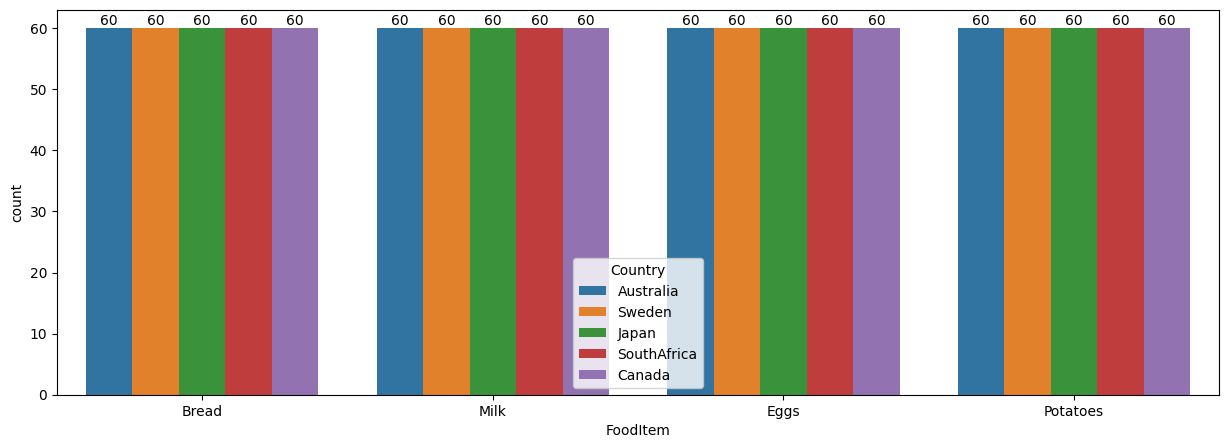

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='FoodItem', hue='Country', data=df)
for i in ax.containers:
    ax.bar_label(i)

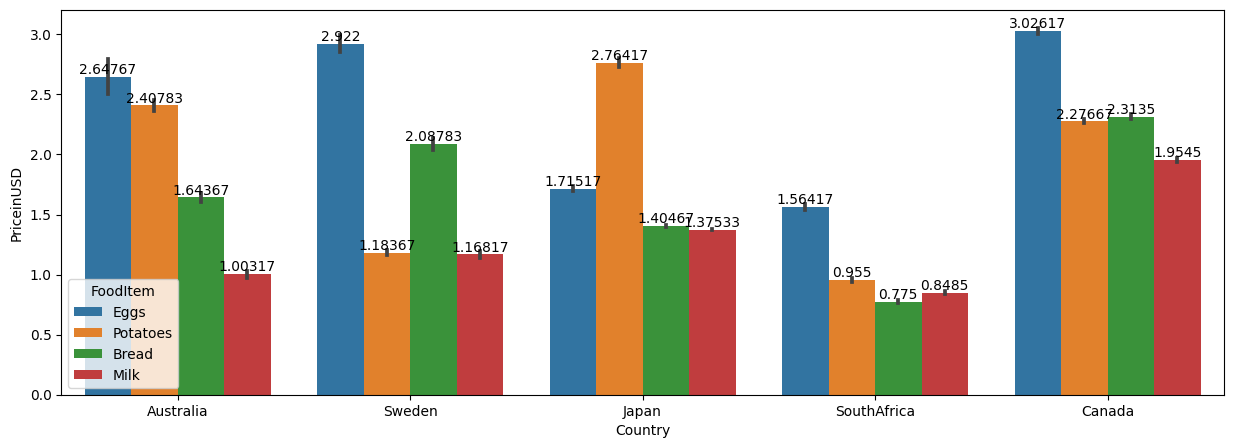

In [ ]:
###Showing Average Price of total
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Country',y='PriceinUSD', hue='FoodItem', hue_order=['Eggs','Potatoes','Bread','Milk'], data=df,
                                                                        estimator=np.mean)
for i in ax.containers:
    ax.bar_label(i)

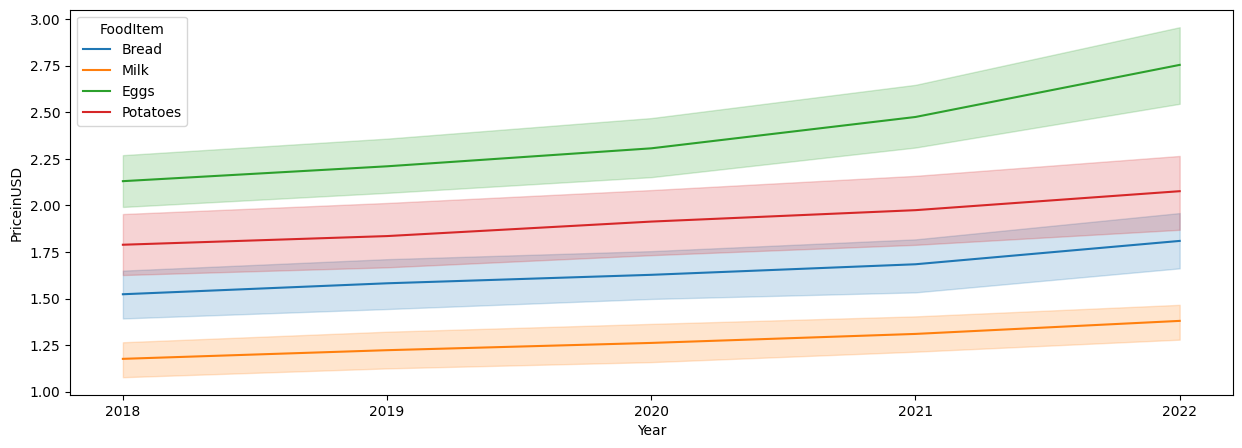

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(x='Year',y='PriceinUSD', hue='FoodItem', data=df, estimator=np.mean)

Transfoming categorical data to numeric data

In [ ]:
df.dtypes

Unnamed: 0             int64
Country               object
FoodItem              object
UnitofMeasurement     object
AveragePrice         float64
Currency              object
PriceinUSD           float64
Availability           int64
Quality               object
Month                 object
Year                  object
dtype: object

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
df = df.drop('UnitofMeasurement', axis = 1)

cat = ['FoodItem', 'Currency', 'Quality','Month','Year']
cont = ['AveragePrice', 'PriceinUSD']

le = preprocessing.LabelEncoder()
df['FoodItem'] = le.fit_transform(df['FoodItem'])
df['Currency'] = le.fit_transform(df['Currency'])
df['Quality'] = le.fit_transform(df['Quality'])
df['Month'] = le.fit_transform(df['Month'])
df['Year'] = le.fit_transform(df['Year'])

In [ ]:
df.head()

,Unnamed: 0,Country,FoodItem,AveragePrice,Currency,PriceinUSD,Availability,Quality,Month,Year
0,0,Australia,0,2.20,0,1.47,1,0,0,0
1,1,Australia,0,2.20,0,1.48,1,0,4,0
2,2,Australia,0,2.20,0,1.48,1,0,5,0
3,3,Australia,0,2.21,0,1.48,1,0,6,0
4,4,Australia,0,2.21,0,1.48,1,0,7,0


Transforming continuous data to numeric

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

df['AveragePrice'] = min_max_scaler.fit_transform(df['AveragePrice'].values.reshape(-1,1))
df['PriceinUSD'] = min_max_scaler.fit_transform(df['PriceinUSD'].values.reshape(-1,1))

In [ ]:
df

,Unnamed: 0,Country,FoodItem,AveragePrice,Currency,PriceinUSD,Availability,Quality,Month,Year
0,0,Australia,0,0.002332,0,0.233533,1,0,0,0
1,1,Australia,0,0.002332,0,0.236527,1,0,4,0
2,2,Australia,0,0.002332,0,0.236527,1,0,5,0
3,3,Australia,0,0.002356,0,0.236527,1,0,6,0
4,4,Australia,0,0.002356,0,0.236527,1,0,7,0
...,...,...,...,...,...,...,...,...,...,...
1195,1195,Canada,3,0.004641,1,0.514970,1,0,10,4
1196,1196,Canada,3,0.004664,1,0.517964,1,0,11,4
1197,1197,Canada,3,0.004712,1,0.520958,1,0,1,4
1198,1198,Canada,3,0.004736,1,0.523952,1,0,2,4


# Which country had the hardest to predict the price i.e country with the highest error in test set?

In [ ]:
#Since we are comparing countries based on price in USD, let's separate the countries into different dataframes
df_AU = df[df.Country == 'Australia']
df_SE = df[df.Country == 'Sweden']
df_JP = df[df.Country == 'Japan']
df_SA = df[df.Country == 'SouthAfrica']
df_CA = df[df.Country == 'Canada']

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
tscv = TimeSeriesSplit()

In [ ]:
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


Australia

In [ ]:
X_AU = df_AU.drop(columns = ['Country', 'Unnamed: 0','PriceinUSD'], axis = 1)
y_AU = df_AU['PriceinUSD']

In [ ]:
for i, (train, test) in enumerate(tscv.split(X_AU)):
    print(f"Fold {i}:")
    print(f"  Train: index={train}")
    print(f"  Test:  index={test}")

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
  Test:  index=[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
  Test:  index=[ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Fold 2:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  6

In [ ]:
X_train_AU = X_AU.loc[train, :]
y_train_AU = y_AU.loc[train]
X_test_AU = X_AU.loc[test, :]
y_test_AU = y_AU.loc[test]

We want to then run these train and test sets through classifers (at least 2) to predict price.

In [ ]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = SVR(kernel='rbf')
clf.fit(X_train_AU, y_train_AU)

SVR()

In [ ]:
y_pred_AU = clf.predict(X_test_AU)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test_AU, y_pred_AU)

0.1515838769318903

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linc = LinearRegression()
linc.fit(X_train_AU, y_train_AU)

LinearRegression()

In [ ]:
y_linc_pred_AU = linc.predict(X_test_AU)

In [ ]:
mean_squared_error(y_test_AU, y_linc_pred_AU)

1.6366158520431534e-06

###Now we do it for every country

Sweden

In [ ]:
X_SE = df_SE.drop(columns = ['Country', 'Unnamed: 0','PriceinUSD'], axis = 1)
y_SE = df_SE['PriceinUSD']

In [ ]:
for i, (train, test) in enumerate(tscv.split(X_SE)):
    print(f"Fold {i}:")
    print(f"  Train: index={train}")
    print(f"  Test:  index={test}")

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
  Test:  index=[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
  Test:  index=[ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Fold 2:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  6

In [ ]:
X_train_SE = X_SE.iloc[train, :]
y_train_SE = y_SE.iloc[train]
X_test_SE = X_SE.iloc[test, :]
y_test_SE = y_SE.iloc[test]

In [ ]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = SVR(kernel='rbf')
clf.fit(X_train_SE, y_train_SE)

SVR()

In [ ]:
y_pred_SE = clf.predict(X_test_SE)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test_SE, y_pred_SE)

0.014450654530053328

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linc = LinearRegression()
linc.fit(X_train_SE, y_train_SE)

LinearRegression()

In [ ]:
y_linc_pred_SE = linc.predict(X_test_SE)

In [ ]:
mean_squared_error(y_test_SE, y_linc_pred_SE)

7.527275125212183e-07

Japan

In [ ]:
X_JP = df_JP.drop(columns = ['Country', 'Unnamed: 0','PriceinUSD'], axis = 1)
y_JP = df_JP['PriceinUSD']

In [ ]:
for i, (train, test) in enumerate(tscv.split(X_JP)):
    print(f"Fold {i}:")
    print(f"  Train: index={train}")
    print(f"  Test:  index={test}")

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
  Test:  index=[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
  Test:  index=[ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Fold 2:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  6

In [ ]:
X_train_JP = X_JP.iloc[train, :]
y_train_JP = y_JP.iloc[train]
X_test_JP = X_JP.iloc[test, :]
y_test_JP = y_JP.iloc[test]

In [ ]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = SVR(kernel='rbf')
clf.fit(X_train_JP, y_train_JP)

SVR()

In [ ]:
y_pred_JP = clf.predict(X_test_JP)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test_JP, y_pred_JP)

0.03759561709614025

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linc = LinearRegression()
linc.fit(X_train_JP, y_train_JP)

LinearRegression()

In [ ]:
y_linc_pred_JP = linc.predict(X_test_JP)

In [ ]:
mean_squared_error(y_test_JP, y_linc_pred_JP)

8.097082848060694e-07

South Africa

In [ ]:
X_SA = df_SA.drop(columns = ['Country', 'Unnamed: 0','PriceinUSD'], axis = 1)
y_SA = df_SA['PriceinUSD']

In [ ]:
for i, (train, test) in enumerate(tscv.split(X_SA)):
    print(f"Fold {i}:")
    print(f"  Train: index={train}")
    print(f"  Test:  index={test}")

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
  Test:  index=[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
  Test:  index=[ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Fold 2:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  6

In [ ]:
X_train_SA = X_SA.iloc[train, :]
y_train_SA = y_SA.iloc[train]
X_test_SA = X_SA.iloc[test, :]
y_test_SA = y_SA.iloc[test]

In [ ]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = SVR(kernel='rbf')
clf.fit(X_train_SA, y_train_SA)

SVR()

In [ ]:
y_pred_SA = clf.predict(X_test_SA)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test_SA, y_pred_SA)

0.0001014242659985883

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linc = LinearRegression()
linc.fit(X_train_SA, y_train_SA)

LinearRegression()

In [ ]:
y_linc_pred_SA = linc.predict(X_test_SA)

In [ ]:
mean_squared_error(y_test_SA, y_linc_pred_SA)

8.226986661550182e-07

Canada

In [ ]:
X_CA = df_CA.drop(columns = ['Country', 'Unnamed: 0','PriceinUSD'], axis = 1)
y_CA = df_CA['PriceinUSD']

In [ ]:
for i, (train, test) in enumerate(tscv.split(X_CA)):
    print(f"Fold {i}:")
    print(f"  Train: index={train}")
    print(f"  Test:  index={test}")

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
  Test:  index=[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
  Test:  index=[ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Fold 2:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  6

In [ ]:
X_train_CA = X_CA.iloc[train, :]
y_train_CA = y_CA.iloc[train]
X_test_CA = X_CA.iloc[test, :]
y_test_CA = y_CA.iloc[test]

In [ ]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = SVR(kernel='rbf')
clf.fit(X_train_CA, y_train_CA)

SVR()

In [ ]:
y_pred_CA = clf.predict(X_test_CA)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test_CA, y_pred_CA)

0.019007572517180195

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linc = LinearRegression()
linc.fit(X_train_CA, y_train_CA)

LinearRegression()

In [ ]:
y_linc_pred_CA = linc.predict(X_test_CA)

In [ ]:
mean_squared_error(y_test_CA, y_linc_pred_CA)

1.238251052604263e-06

###To compare the different countries, we will combine all the mean squared error values into a dataframe and graph the results.

In [ ]:
data = {"Country": ['Australia','Sweden','Japan', 'SouthAfrica','Canada'],
        "MSE SVR": [mean_squared_error(y_test_AU, y_pred_AU),mean_squared_error(y_test_SE, y_pred_SE),
                    mean_squared_error(y_test_JP, y_pred_JP),mean_squared_error(y_test_SA, y_pred_SA),
                    mean_squared_error(y_test_CA, y_pred_CA)],
        "MSE LR": [mean_squared_error(y_test_AU, y_linc_pred_AU), mean_squared_error(y_test_SE, y_linc_pred_SE),
                  mean_squared_error(y_test_JP, y_linc_pred_JP), mean_squared_error(y_test_SA, y_linc_pred_SA),
                  mean_squared_error(y_test_CA, y_linc_pred_CA)]}

In [ ]:
df_results = pd.DataFrame(data=data)

In [ ]:
df_results

,Country,MSE SVR,MSE LR
0,Australia,0.151584,1.636616e-06
1,Sweden,0.014451,7.527275e-07
2,Japan,0.037596,8.097083e-07
3,SouthAfrica,0.000101,8.226987e-07
4,Canada,0.019008,1.238251e-06


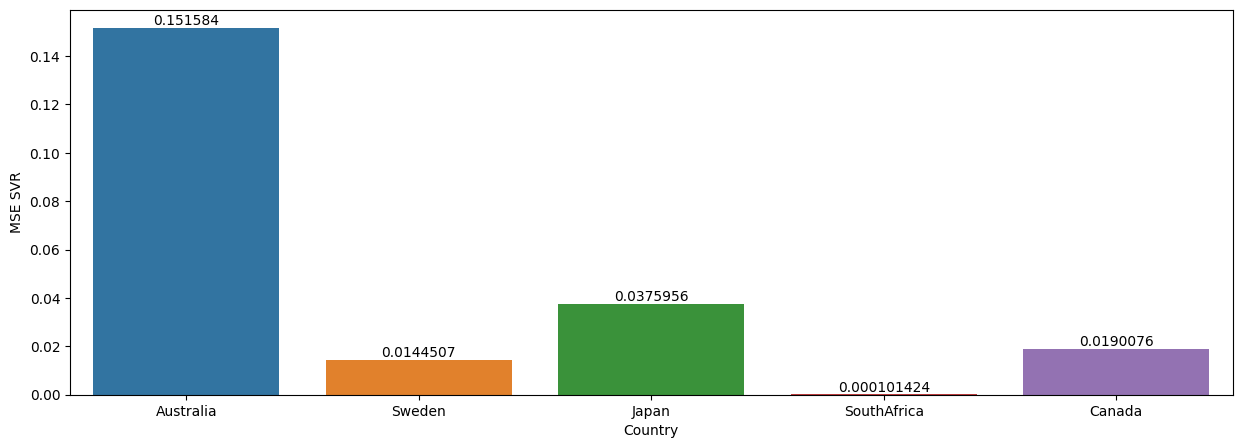

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Country',y='MSE SVR', data=df_results)

for i in ax.containers:
    ax.bar_label(i)

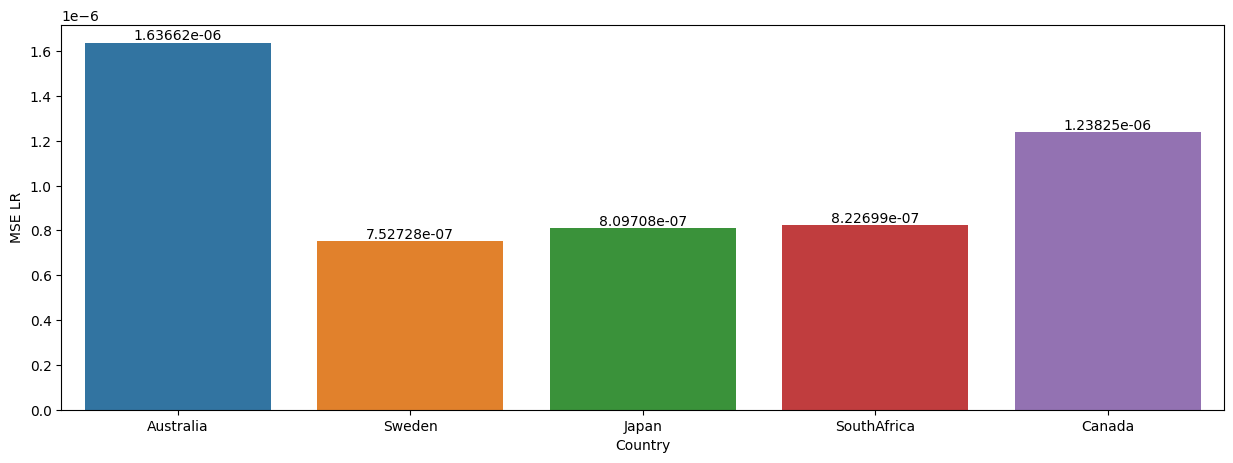

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Country',y='MSE LR', data=df_results)

for i in ax.containers:
    ax.bar_label(i)

# When you increase the `gap` in the TimeSeriesSplit function from 0 to 2, does it improve or decrease the test error?

The sklearn website outlines what gap does to the data, describing it as "Number of samples to exclude from the end of each train set before the test set."

In [ ]:
tscv_2 = TimeSeriesSplit(gap=2)

In [ ]:
print(tscv_2)

TimeSeriesSplit(gap=2, max_train_size=None, n_splits=5, test_size=None)


Australia

In [ ]:
X_AU = df_AU.drop(columns = ['Country', 'Unnamed: 0','PriceinUSD'], axis = 1)
y_AU = df_AU['PriceinUSD']

In [ ]:
for i, (train, test) in enumerate(tscv_2.split(X_AU)):
    print(f"Fold {i}:")
    print(f"  Train: index={train}")
    print(f"  Test:  index={test}")

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
  Test:  index=[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]
  Test:  index=[ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Fold 2:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  6

In [ ]:
X_train_AU = X_AU.loc[train, :]
y_train_AU = y_AU.loc[train]
X_test_AU = X_AU.loc[test, :]
y_test_AU = y_AU.loc[test]

In [ ]:
#We want to then run these train and test sets through classifers (at least 2) to predict price.

In [ ]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = SVR(kernel='rbf')
clf.fit(X_train_AU, y_train_AU)

SVR()

In [ ]:
y_pred_AU = clf.predict(X_test_AU)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test_AU, y_pred_AU)

0.1602298672590084

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linc = LinearRegression()
linc.fit(X_train_AU, y_train_AU)

LinearRegression()

In [ ]:
y_linc_pred_AU = linc.predict(X_test_AU)

In [ ]:
mean_squared_error(y_test_AU, y_linc_pred_AU)

1.6349790339423128e-06

Sweden

In [ ]:
X_SE = df_SE.drop(columns = ['Country', 'Unnamed: 0','PriceinUSD'], axis = 1)
y_SE = df_SE['PriceinUSD']

In [ ]:
for i, (train, test) in enumerate(tscv_2.split(X_SE)):
    print(f"Fold {i}:")
    print(f"  Train: index={train}")
    print(f"  Test:  index={test}")

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
  Test:  index=[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]
  Test:  index=[ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Fold 2:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  6

In [ ]:
X_train_SE = X_SE.iloc[train, :]
y_train_SE = y_SE.iloc[train]
X_test_SE = X_SE.iloc[test, :]
y_test_SE = y_SE.iloc[test]

In [ ]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = SVR(kernel='rbf')
clf.fit(X_train_SE, y_train_SE)

SVR()

In [ ]:
y_pred_SE = clf.predict(X_test_SE)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test_SE, y_pred_SE)

0.016796955273747964

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linc = LinearRegression()
linc.fit(X_train_SE, y_train_SE)

LinearRegression()

In [ ]:
y_linc_pred_SE = linc.predict(X_test_SE)

In [ ]:
mean_squared_error(y_test_SE, y_linc_pred_SE)

7.549375799288433e-07

Japan

In [ ]:
X_JP = df_JP.drop(columns = ['Country', 'Unnamed: 0','PriceinUSD'], axis = 1)
y_JP = df_JP['PriceinUSD']

In [ ]:
for i, (train, test) in enumerate(tscv_2.split(X_JP)):
    print(f"Fold {i}:")
    print(f"  Train: index={train}")
    print(f"  Test:  index={test}")

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
  Test:  index=[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]
  Test:  index=[ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Fold 2:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  6

In [ ]:
X_train_JP = X_JP.iloc[train, :]
y_train_JP = y_JP.iloc[train]
X_test_JP = X_JP.iloc[test, :]
y_test_JP = y_JP.iloc[test]

In [ ]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = SVR(kernel='rbf')
clf.fit(X_train_JP, y_train_JP)

SVR()

In [ ]:
y_pred_JP = clf.predict(X_test_JP)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test_JP, y_pred_JP)

0.039088625100661356

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linc = LinearRegression()
linc.fit(X_train_JP, y_train_JP)

LinearRegression()

In [ ]:
y_linc_pred_JP = linc.predict(X_test_JP)

In [ ]:
mean_squared_error(y_test_JP, y_linc_pred_JP)

7.815884067379517e-07

South Africa

In [ ]:
X_SA = df_SA.drop(columns = ['Country', 'Unnamed: 0','PriceinUSD'], axis = 1)
y_SA = df_SA['PriceinUSD']

In [ ]:
for i, (train, test) in enumerate(tscv_2.split(X_SA)):
    print(f"Fold {i}:")
    print(f"  Train: index={train}")
    print(f"  Test:  index={test}")

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
  Test:  index=[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]
  Test:  index=[ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Fold 2:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  6

In [ ]:
X_train_SA = X_SA.iloc[train, :]
y_train_SA = y_SA.iloc[train]
X_test_SA = X_SA.iloc[test, :]
y_test_SA = y_SA.iloc[test]

In [ ]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = SVR(kernel='rbf')
clf.fit(X_train_SA, y_train_SA)

SVR()

In [ ]:
y_pred_SA = clf.predict(X_test_SA)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test_SA, y_pred_SA)

0.00011031162554056381

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linc = LinearRegression()
linc.fit(X_train_SA, y_train_SA)

LinearRegression()

In [ ]:
y_linc_pred_SA = linc.predict(X_test_SA)

In [ ]:
mean_squared_error(y_test_SA, y_linc_pred_SA)

8.266589884028325e-07

Canada

In [ ]:
X_CA = df_CA.drop(columns = ['Country', 'Unnamed: 0','PriceinUSD'], axis = 1)
y_CA = df_CA['PriceinUSD']

In [ ]:
for i, (train, test) in enumerate(tscv_2.split(X_CA)):
    print(f"Fold {i}:")
    print(f"  Train: index={train}")
    print(f"  Test:  index={test}")

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
  Test:  index=[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]
  Test:  index=[ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Fold 2:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  6

In [ ]:
X_train_CA = X_CA.iloc[train, :]
y_train_CA = y_CA.iloc[train]
X_test_CA = X_CA.iloc[test, :]
y_test_CA = y_CA.iloc[test]

In [ ]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = SVR(kernel='rbf')
clf.fit(X_train_CA, y_train_CA)

SVR()

In [ ]:
y_pred_CA = clf.predict(X_test_CA)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test_CA, y_pred_CA)

0.020959118476014862

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linc = LinearRegression()
linc.fit(X_train_CA, y_train_CA)

LinearRegression()

In [ ]:
y_linc_pred_CA = linc.predict(X_test_CA)

In [ ]:
mean_squared_error(y_test_CA, y_linc_pred_CA)

1.2370178263091398e-06

In [ ]:
df_results

,Country,MSE SVR,MSE LR
0,Australia,0.151584,1.636616e-06
1,Sweden,0.014451,7.527275e-07
2,Japan,0.037596,8.097083e-07
3,SouthAfrica,0.000101,8.226987e-07
4,Canada,0.019008,1.238251e-06


###We then add the results to our previous dataframe with the information provided, and see what the impact of increase the gap from 0 to 2 does on the data.

In [ ]:
MSE_SVR_2 = [mean_squared_error(y_test_AU, y_pred_AU), mean_squared_error(y_test_SE, y_pred_SE),
             mean_squared_error(y_test_JP, y_pred_JP), mean_squared_error(y_test_SA, y_pred_SA),
            mean_squared_error(y_test_CA, y_pred_CA)]

MSE_LR_2 = [mean_squared_error(y_test_AU, y_linc_pred_AU), mean_squared_error(y_test_SE, y_linc_pred_SE),
           mean_squared_error(y_test_JP, y_linc_pred_JP), mean_squared_error(y_test_SA, y_linc_pred_SA),
           mean_squared_error(y_test_CA, y_linc_pred_CA)]

In [ ]:
df_results['MSE SVR 2'] = MSE_SVR_2
df_results['MSE LR 2'] = MSE_LR_2
df_results

,Country,MSE SVR,MSE LR,MSE SVR 2,MSE LR 2
0,Australia,0.151584,1.636616e-06,0.160230,1.634979e-06
1,Sweden,0.014451,7.527275e-07,0.016797,7.549376e-07
2,Japan,0.037596,8.097083e-07,0.039089,7.815884e-07
3,SouthAfrica,0.000101,8.226987e-07,0.000110,8.266590e-07
4,Canada,0.019008,1.238251e-06,0.020959,1.237018e-06


In [ ]:
df_results['Difference for SVR'] = df_results['MSE SVR'] - df_results['MSE SVR 2']
df_results['Difference for LR'] = df_results['MSE LR'] - df_results['MSE LR 2']

In [ ]:
df_results

,Country,MSE SVR,MSE LR,MSE SVR 2,MSE LR 2,Difference for SVR,Difference for LR
0,Australia,0.151584,1.636616e-06,0.160230,1.634979e-06,-0.008646,1.636818e-09
1,Sweden,0.014451,7.527275e-07,0.016797,7.549376e-07,-0.002346,-2.210067e-09
2,Japan,0.037596,8.097083e-07,0.039089,7.815884e-07,-0.001493,2.811988e-08
3,SouthAfrica,0.000101,8.226987e-07,0.000110,8.266590e-07,-0.000009,-3.960322e-09
4,Canada,0.019008,1.238251e-06,0.020959,1.237018e-06,-0.001952,1.233226e-09


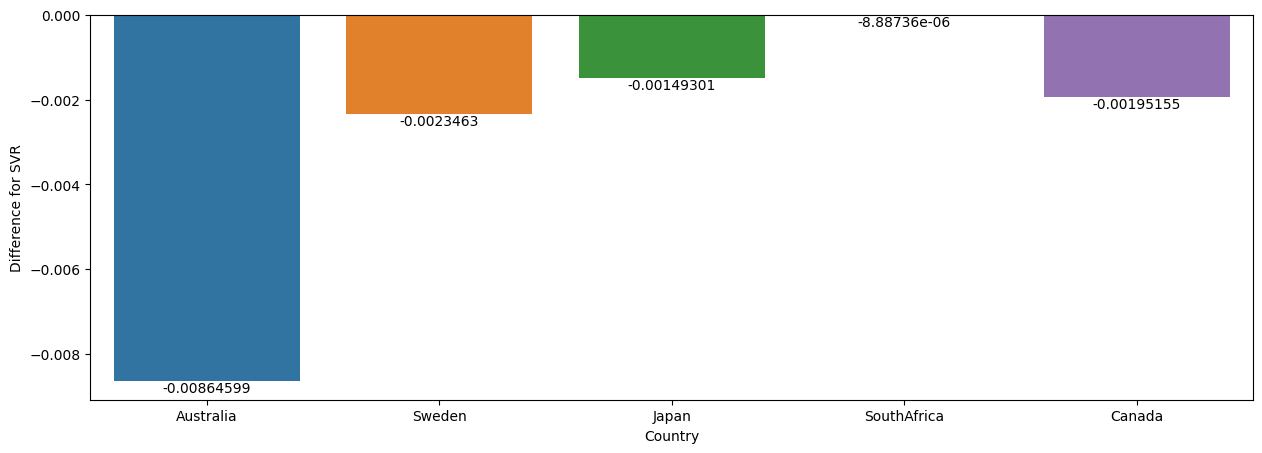

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Country',y='Difference for SVR', data=df_results)

for i in ax.containers:
    ax.bar_label(i)

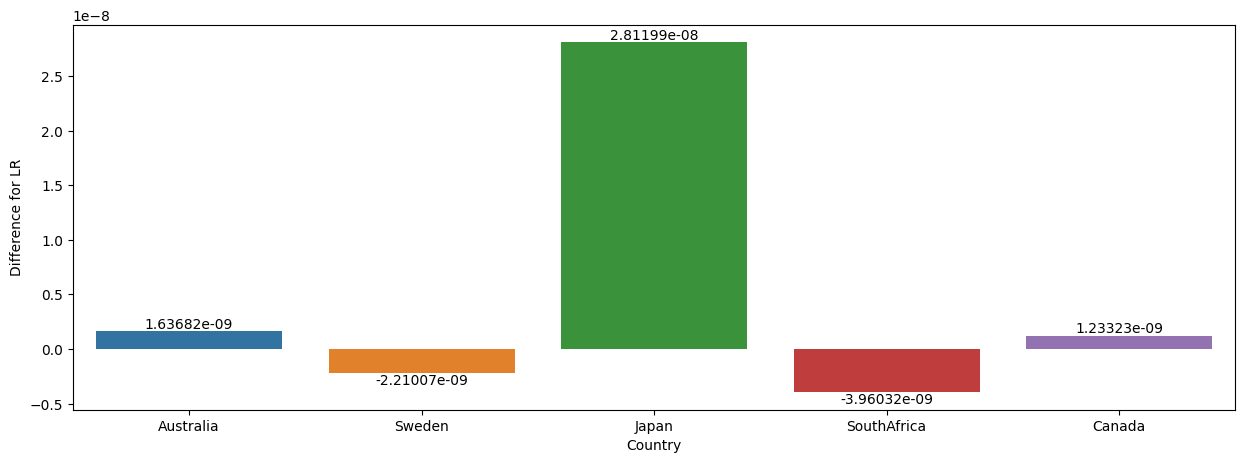

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Country',y='Difference for LR', data=df_results)

for i in ax.containers:
    ax.bar_label(i)

# Put the 4 products into one of the two buckets (only one).
- Products that change the price similarly across all countries.
- Products whose prices change are independent of the country. In other words, just because it increased in countries A and B, does not mean it will also increase equally in countries C and D - note equally is important here, as all products will increase in price in all countries over time.


In [ ]:
df_copy

,Unnamed: 0,Country,FoodItem,UnitofMeasurement,AveragePrice,Currency,PriceinUSD,Availability,Quality,Year_Month,Month,Year
0,0,Australia,Bread,Loaf,2.20,AUD,1.47,1,High,2018-1,1,2018
1,1,Australia,Bread,Loaf,2.20,AUD,1.48,1,High,2018-2,2,2018
2,2,Australia,Bread,Loaf,2.20,AUD,1.48,1,High,2018-3,3,2018
3,3,Australia,Bread,Loaf,2.21,AUD,1.48,1,High,2018-4,4,2018
4,4,Australia,Bread,Loaf,2.21,AUD,1.48,1,High,2018-5,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,Canada,Potatoes,1Kg,3.17,CAD,2.41,1,High,2022-8,8,2022
1196,1196,Canada,Potatoes,1Kg,3.18,CAD,2.42,1,High,2022-9,9,2022
1197,1197,Canada,Potatoes,1Kg,3.20,CAD,2.43,1,High,2022-10,10,2022
1198,1198,Canada,Potatoes,1Kg,3.21,CAD,2.44,1,High,2022-11,11,2022


Bread

In [ ]:
bread = {"Australia": df_copy[((df_copy.Country == 'Australia') & (df_copy.FoodItem == 'Bread'))].PriceinUSD.values,
         "Sweden": df_copy[((df_copy.Country == 'Sweden') & (df_copy.FoodItem == 'Bread'))].PriceinUSD.values,
        "Japan": df_copy[((df_copy.Country == 'Japan') & (df_copy.FoodItem == 'Bread'))].PriceinUSD.values,
        "South Africa": df_copy[((df_copy.Country == 'SouthAfrica') & (df_copy.FoodItem =='Bread'))].PriceinUSD.values,
        "Canada": df_copy[((df_copy.Country == 'Canada') & (df_copy.FoodItem == 'Bread'))].PriceinUSD.values}

In [ ]:
df_bread = pd.DataFrame(data=bread, index=range(60))

In [ ]:
df_bread.corr()

,Australia,Sweden,Japan,South Africa,Canada
Australia,1.000000,0.989305,0.903667,0.976703,0.980367
Sweden,0.989305,1.000000,0.921922,0.989925,0.993569
Japan,0.903667,0.921922,1.000000,0.883925,0.894021
South Africa,0.976703,0.989925,0.883925,1.000000,0.995610
Canada,0.980367,0.993569,0.894021,0.995610,1.000000


<Axes: >

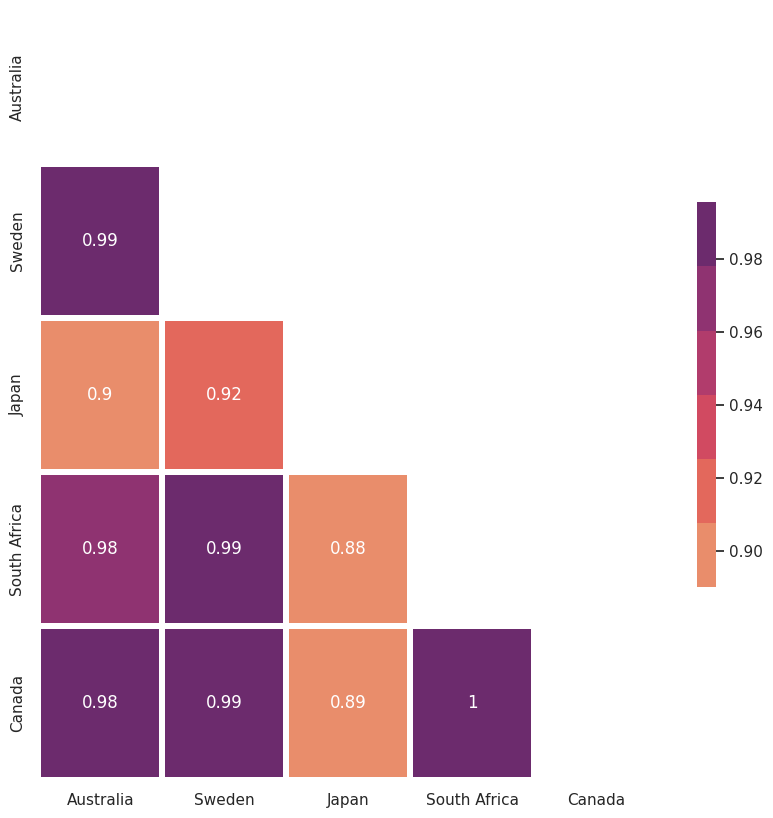

In [ ]:
sns.set_theme(style="white")
corr = df_bread.corr()
mask = np.triu(df_bread.corr())
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("flare")

sns.heatmap(corr,
            annot=True,
            mask=mask,
            cmap=cmap,
            vmin=.89,
            linewidths=3,
            cbar_kws={"shrink": .5}
           )

Milk

In [ ]:
milk = {"Australia": df_copy[((df_copy.Country == 'Australia') & (df_copy.FoodItem == 'Milk'))].PriceinUSD.values,
         "Sweden": df_copy[((df_copy.Country == 'Sweden') & (df_copy.FoodItem == 'Milk'))].PriceinUSD.values,
        "Japan": df_copy[((df_copy.Country == 'Japan') & (df_copy.FoodItem == 'Milk'))].PriceinUSD.values,
        "South Africa": df_copy[((df_copy.Country == 'SouthAfrica') & (df_copy.FoodItem =='Milk'))].PriceinUSD.values,
        "Canada": df_copy[((df_copy.Country == 'Canada') & (df_copy.FoodItem == 'Milk'))].PriceinUSD.values}

In [ ]:
df_milk = pd.DataFrame(data=milk, index=range(60))

In [ ]:
df_milk.corr()

,Australia,Sweden,Japan,South Africa,Canada
Australia,1.000000,0.985648,0.936733,0.983584,0.986630
Sweden,0.985648,1.000000,0.962612,0.989082,0.997792
Japan,0.936733,0.962612,1.000000,0.941626,0.955179
South Africa,0.983584,0.989082,0.941626,1.000000,0.989122
Canada,0.986630,0.997792,0.955179,0.989122,1.000000


<Axes: >

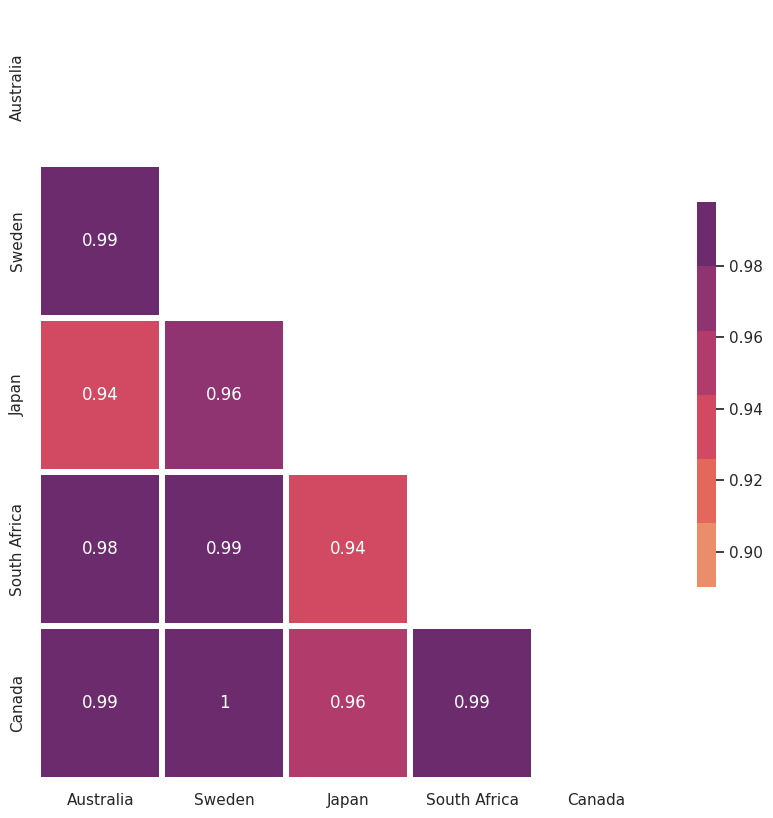

In [ ]:
sns.set_theme(style="white")
corr = df_milk.corr()
mask = np.triu(df_milk.corr())
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("flare")

sns.heatmap(corr,
            annot=True,
            mask=mask,
            cmap=cmap,
            vmin=.89,
            linewidths=3,
            cbar_kws={"shrink": .5}
           )

Eggs

In [ ]:
eggs = {"Australia": df_copy[((df_copy.Country == 'Australia') & (df_copy.FoodItem == 'Eggs'))].PriceinUSD.values,
         "Sweden": df_copy[((df_copy.Country == 'Sweden') & (df_copy.FoodItem == 'Eggs'))].PriceinUSD.values,
        "Japan": df_copy[((df_copy.Country == 'Japan') & (df_copy.FoodItem == 'Eggs'))].PriceinUSD.values,
        "South Africa": df_copy[((df_copy.Country == 'SouthAfrica') & (df_copy.FoodItem =='Eggs'))].PriceinUSD.values,
        "Canada": df_copy[((df_copy.Country == 'Canada') & (df_copy.FoodItem == 'Eggs'))].PriceinUSD.values}

In [ ]:
df_eggs = pd.DataFrame(data=eggs, index=range(60))

In [ ]:
df_eggs.corr()

,Australia,Sweden,Japan,South Africa,Canada
Australia,1.000000,0.937691,0.939788,0.915726,0.967435
Sweden,0.937691,1.000000,0.993433,0.994955,0.987118
Japan,0.939788,0.993433,1.000000,0.993443,0.977905
South Africa,0.915726,0.994955,0.993443,1.000000,0.977263
Canada,0.967435,0.987118,0.977905,0.977263,1.000000


<Axes: >

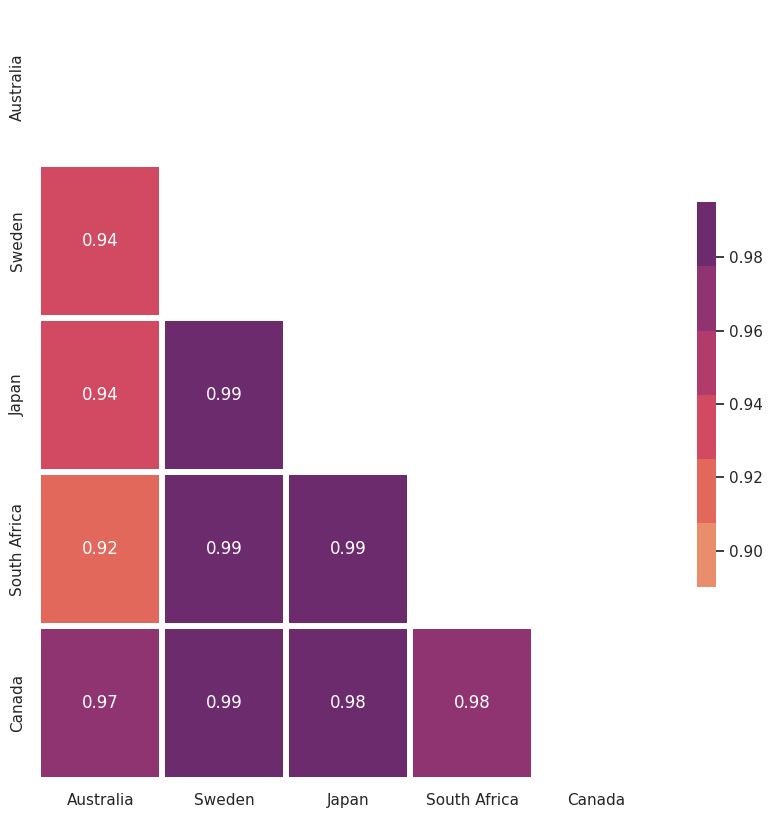

In [ ]:
sns.set_theme(style="white")
corr = df_eggs.corr()
mask = np.triu(df_eggs.corr())
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("flare")

sns.heatmap(corr,
            annot=True,
            mask=mask,
            cmap=cmap,
            vmin=.89,
            linewidths=3,
            cbar_kws={"shrink": .5}
           )

Potatoes

In [ ]:
potatoes = {"Australia": df_copy[((df_copy.Country == 'Australia') & (df_copy.FoodItem == 'Potatoes'))].PriceinUSD.values,
         "Sweden": df_copy[((df_copy.Country == 'Sweden') & (df_copy.FoodItem == 'Potatoes'))].PriceinUSD.values,
        "Japan": df_copy[((df_copy.Country == 'Japan') & (df_copy.FoodItem == 'Potatoes'))].PriceinUSD.values,
        "South Africa": df_copy[((df_copy.Country == 'SouthAfrica') & (df_copy.FoodItem =='Potatoes'))].PriceinUSD.values,
        "Canada": df_copy[((df_copy.Country == 'Canada') & (df_copy.FoodItem == 'Potatoes'))].PriceinUSD.values}

In [ ]:
df_potatoes = pd.DataFrame(data=potatoes, index=range(60))

In [ ]:
df_potatoes.corr()

,Australia,Sweden,Japan,South Africa,Canada
Australia,1.000000,0.933634,0.987402,0.988171,0.958852
Sweden,0.933634,1.000000,0.963220,0.942317,0.985570
Japan,0.987402,0.963220,1.000000,0.991154,0.984908
South Africa,0.988171,0.942317,0.991154,1.000000,0.965805
Canada,0.958852,0.985570,0.984908,0.965805,1.000000


<Axes: >

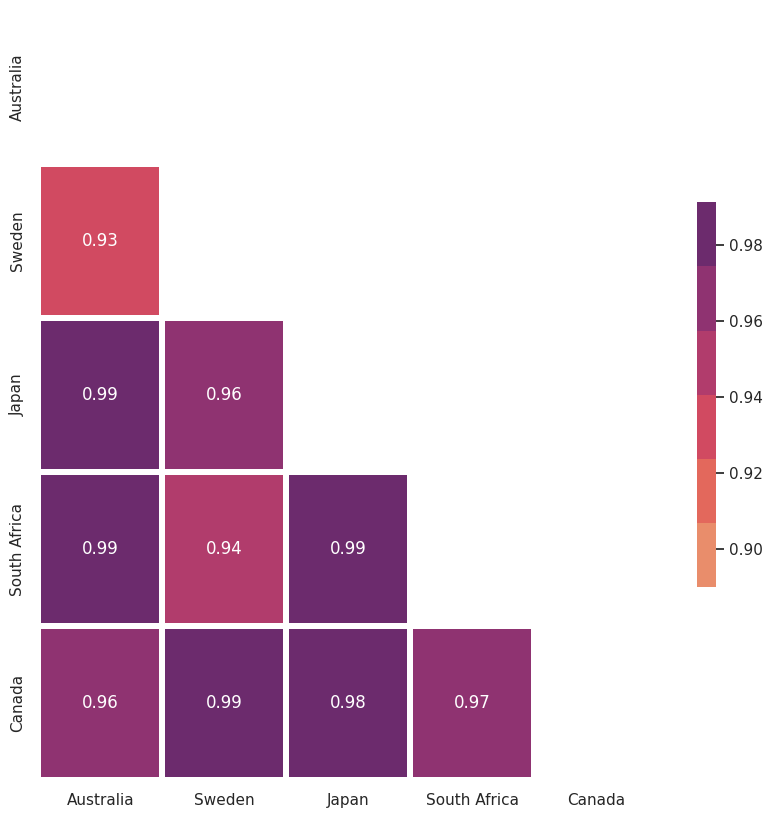

In [ ]:
sns.set_theme(style="white")
corr = df_potatoes.corr()
mask = np.triu(df_potatoes.corr())
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("flare")

sns.heatmap(corr,
            annot=True,
            mask=mask,
            cmap=cmap,
            vmin=.89,
            linewidths=3,
            cbar_kws={"shrink": .5}
           )

### Visualize the hyper-parameters and their impact on cross-fold validation.

In [ ]:
from time import time
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import scipy.stats as stats

In [ ]:
df_copy_hp = df_copy

In [ ]:
df_copy_hp

,Unnamed: 0,Country,FoodItem,UnitofMeasurement,AveragePrice,Currency,PriceinUSD,Availability,Quality,Year_Month,Month,Year
0,0,Australia,Bread,Loaf,2.20,AUD,1.47,1,High,2018-1,1,2018
1,1,Australia,Bread,Loaf,2.20,AUD,1.48,1,High,2018-2,2,2018
2,2,Australia,Bread,Loaf,2.20,AUD,1.48,1,High,2018-3,3,2018
3,3,Australia,Bread,Loaf,2.21,AUD,1.48,1,High,2018-4,4,2018
4,4,Australia,Bread,Loaf,2.21,AUD,1.48,1,High,2018-5,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,Canada,Potatoes,1Kg,3.17,CAD,2.41,1,High,2022-8,8,2022
1196,1196,Canada,Potatoes,1Kg,3.18,CAD,2.42,1,High,2022-9,9,2022
1197,1197,Canada,Potatoes,1Kg,3.20,CAD,2.43,1,High,2022-10,10,2022
1198,1198,Canada,Potatoes,1Kg,3.21,CAD,2.44,1,High,2022-11,11,2022


In [ ]:
le = preprocessing.LabelEncoder()
df_copy_hp['FoodItem'] = le.fit_transform(df_copy_hp['FoodItem'])
df_copy_hp['Currency'] = le.fit_transform(df_copy_hp['Currency'])
df_copy_hp['Quality'] = le.fit_transform(df_copy_hp['Quality'])
df_copy_hp['Year'] = le.fit_transform(df_copy_hp['Year'])
df_copy_hp['UnitofMeasurement'] = le.fit_transform(df_copy_hp['UnitofMeasurement'])

In [ ]:
df_copy_hp['Country'] = le.fit_transform(df_copy_hp['Country'])

In [ ]:
df_copy_hp = df_copy_hp.drop(columns = 'Year_Month')

In [ ]:
X = df_copy_hp
y = df_copy_hp['Month']

In [ ]:
clf = SGDClassifier(loss="hinge", penalty="elasticnet", fit_intercept=True)

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

In [ ]:
param_dist = {
    "average": [True, False],
    "l1_ratio": stats.uniform(0, 1),
    "alpha": stats.loguniform(1e-2, 1e0),
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=n_iter_search, error_score='raise'
)

In [ ]:
start = time()
random_search.fit(X, y)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


RandomizedSearchCV took 6.79 seconds for 15 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.130 (std: 0.039)
Parameters: {'alpha': 0.24583103670347278, 'average': False, 'l1_ratio': 0.9307540746723949}

Model with rank: 2
Mean validation score: 0.105 (std: 0.031)
Parameters: {'alpha': 0.08096438107845101, 'average': False, 'l1_ratio': 0.4014428155627533}

Model with rank: 3
Mean validation score: 0.105 (std: 0.032)
Parameters: {'alpha': 0.40018347990091807, 'average': False, 'l1_ratio': 0.8299214359643263}



In [ ]:
param_grid = {
    "average": [True, False],
    "l1_ratio": np.linspace(0, 1, num=10),
    "alpha": np.power(10, np.arange(-2, 1, dtype=float)),
}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)

In [ ]:
start = time()
grid_search.fit(X, y)

print(
    "GridSearchCV took %.2f seconds for %d candidate parameter settings."
    % (time() - start, len(grid_search.cv_results_["params"]))
)
report(grid_search.cv_results_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

GridSearchCV took 32.14 seconds for 60 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.153 (std: 0.065)
Parameters: {'alpha': 0.01, 'average': False, 'l1_ratio': 0.2222222222222222}

Model with rank: 2
Mean validation score: 0.143 (std: 0.033)
Parameters: {'alpha': 1.0, 'average': False, 'l1_ratio': 0.2222222222222222}

Model with rank: 3
Mean validation score: 0.131 (std: 0.042)
Parameters: {'alpha': 0.01, 'average': False, 'l1_ratio': 0.7777777777777777}



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'param_average', 'param_l1_ratio', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
ddf = pd.DataFrame.from_dict(grid_search.cv_results_)[['param_alpha', 'param_average', 'param_l1_ratio', 'mean_test_score']]

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

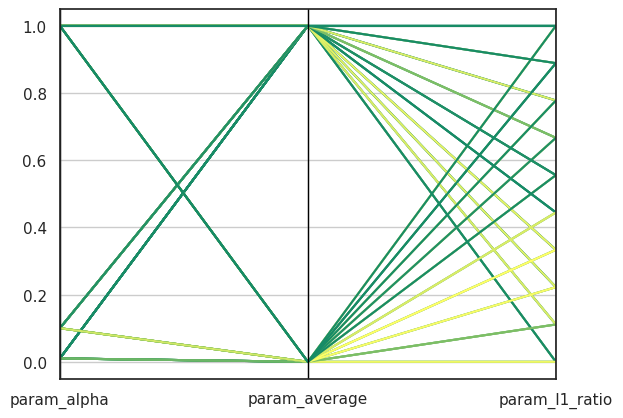

In [ ]:
parallel_coordinates(ddf, 'mean_test_score', colormap=plt.get_cmap("summer"))
plt.legend().set_visible(False)